In [1]:
from qiskit import *
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram
import matplotlib
import pylatexenc

In [2]:
circuit = QuantumCircuit(2,2)

# Alternative way below:

quantum_register=QuantumRegister(2)
classical_register=ClassicalRegister(2)
circuit = QuantumCircuit(quantum_register,classical_register)

In [3]:
circuit.draw()

q0_0: 
      
q0_1: 
      
c0: 2/

In [4]:
%matplotlib inline

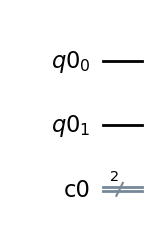

In [5]:
circuit.draw(output='mpl')

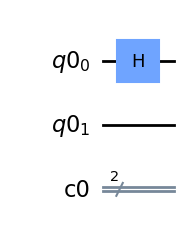

In [6]:
circuit.h(0)
circuit.draw(output='mpl')

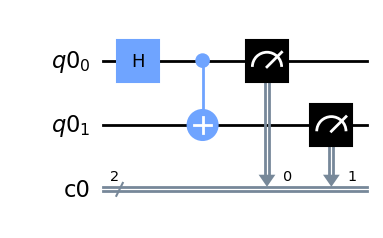

In [7]:
circuit.cx(0,1) # Control Qubit 0, target 1
circuit.measure([0,1],[0,1])
circuit.draw(output='mpl')

In [8]:
simulator = Aer.get_backend('qasm_simulator')
result=execute(circuit,backend=simulator).result()

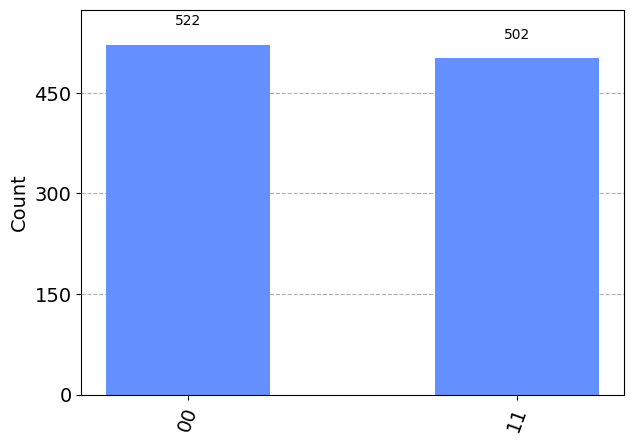

In [9]:
plot_histogram(result.get_counts(circuit))

In [10]:
IBMQ.load_account()

C:\Users\mateu\AppData\Local\Temp\ipykernel_20384\485379158.py:1: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.load_account()
C:\Users\mateu\AppData\Local\Temp\ipykernel_20384\485379158.py:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [11]:
provider = IBMQ.get_provider("ibm-q")
quantum_computer = provider.get_backend("ibmq_lima")

In [12]:
job = execute(circuit,backend=quantum_computer)
job_monitor(job)

Job Status: job is queued (None)

KeyboardInterrupt: 

In [13]:
result = job.result()
plot_histogram(result.get_counts(circuit))